In [3]:
!pip install pandas_profiling
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
from numpy import median

In [4]:
"Problem set 1"

'Problem set 1'

In [5]:
cus = pd.read_csv('Wholesale Customer.csv')

In [6]:
# 1.1. Use methods of descriptive statistics to summarize data.
cus.head()

Buyer/Spender Channel Region  Fresh  Milk  Grocery  Frozen  \
0              1  Retail  Other  12669  9656     7561     214   
1              2  Retail  Other   7057  9810     9568    1762   
2              3  Retail  Other   6353  8808     7684    2405   
3              4   Hotel  Other  13265  1196     4221    6404   
4              5  Retail  Other  22615  5410     7198    3915   

   Detergents_Paper  Delicatessen  
0              2674          1338  
1              3293          1776  
2              3516          7844  
3               507          1788  
4              1777          5185

In [7]:
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [8]:
cus.shape

(440, 9)

In [9]:
cus.isnull().values.any()

False

In [10]:
cus.describe().transpose()

count          mean           std   min      25%     50%  \
Buyer/Spender     440.0    220.500000    127.161315   1.0   110.75   220.5   
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicatessen      440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                       75%       max  
Buyer/Spender       330.25     440.0  
Fresh             16933.75  112151.0  
Milk               7190.25   73498.0  
Grocery           10655.75   92780.0  
Frozen             3554.25   60869.0  
Detergents_Paper   3922.00   40827.0  
Delicatessen       1820.25   47943.0

In [11]:
# This code generates a report using pandas-profiling. A section of its output will be go into the final business report. 
profile = ProfileReport(cus)
profile.to_file(output_file="output2.html")
#displaying the report, 2 ways of doing it.
profile.to_widgets()
profile.to_notebook_iframe()

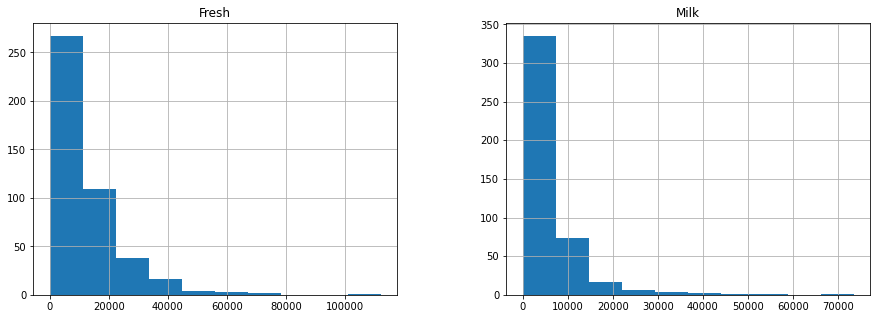

In [12]:
cus[['Fresh','Milk']].hist(figsize=(15,5)); # Histogram to study frequency distribution

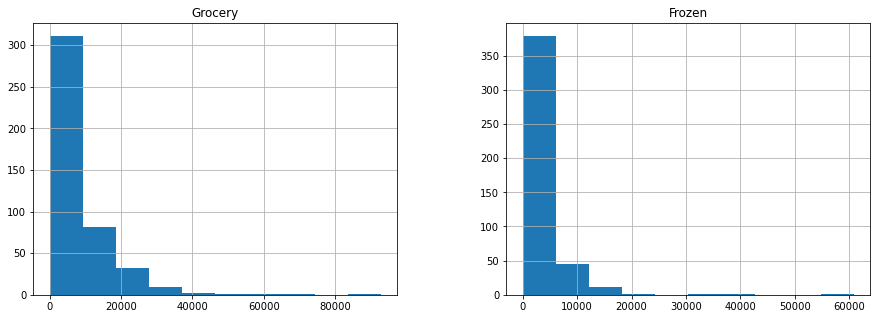

In [13]:
cus[['Grocery','Frozen']].hist(figsize=(15,5)); # Histogram to study frequency distribution

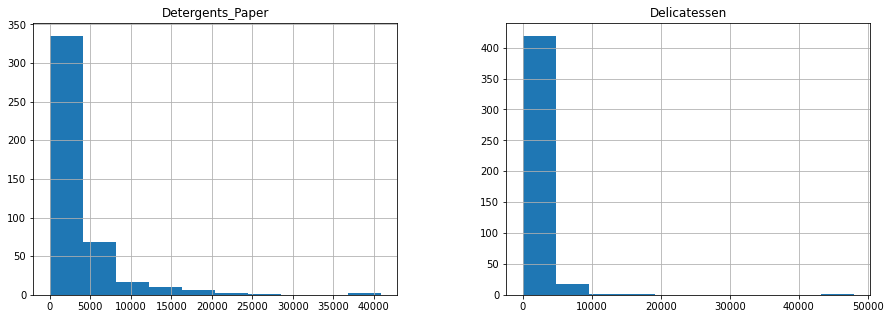

In [14]:
cus[['Detergents_Paper','Delicatessen']].hist(figsize=(15,5)); # Histogram to study frequency distribution

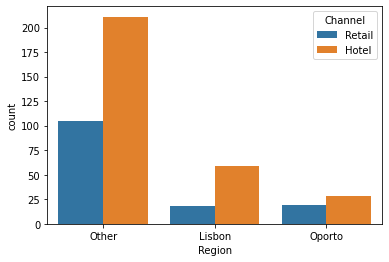

In [15]:
sns.countplot(x="Region", hue="Channel", data=cus);

In [16]:
cus['Total'] = cus['Fresh'] + cus['Milk'] + cus['Grocery'] + cus['Frozen'] + cus['Detergents_Paper'] + cus['Delicatessen']
# A column called 'Total' is added to the dataset

In [17]:
cus.head()

Buyer/Spender Channel Region  Fresh  Milk  Grocery  Frozen  \
0              1  Retail  Other  12669  9656     7561     214   
1              2  Retail  Other   7057  9810     9568    1762   
2              3  Retail  Other   6353  8808     7684    2405   
3              4   Hotel  Other  13265  1196     4221    6404   
4              5  Retail  Other  22615  5410     7198    3915   

   Detergents_Paper  Delicatessen  Total  
0              2674          1338  34112  
1              3293          1776  33266  
2              3516          7844  36610  
3               507          1788  27381  
4              1777          5185  46100

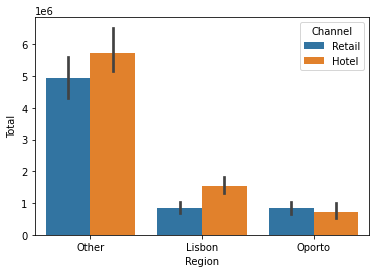

In [18]:
sns.barplot(x="Region", y = 'Total', hue="Channel", data=cus, estimator=sum);

In [19]:
df1 = cus.groupby(['Region', 'Channel'])['Total'].sum()
df1
# df2 = cus.groupby(['Region'])['Total'].sum()
# df2 = cus.groupby(['Channel'])['Total'].sum()
# df2

Region  Channel
Lisbon  Hotel      1538342
        Retail      848471
Oporto  Hotel       719150
        Retail      835938
Other   Hotel      5742077
        Retail     4935522
Name: Total, dtype: int64

In [20]:
# 1.1 Which Region and which Channel seems to spend more?
df1.loc[df1 == max(df1)]

Region  Channel
Other   Hotel      5742077
Name: Total, dtype: int64

In [21]:
# 1.1 Which Region and which Channel seems to spend less?
df1.loc[df1 == min(df1)]

Region  Channel
Oporto  Hotel      719150
Name: Total, dtype: int64

In [22]:
# 1.2. There are 6 different varieties of items are considered.
# Describe and comment/explain all the varieties across Region and Channel.
# The problem is: ''Do all varieties show similar behaviour across Region and Channel?''
df2 = cus.groupby(['Region', 'Channel'])[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']]
df2
df2.describe().transpose()

Region                        Lisbon                      Oporto  \
Channel                        Hotel        Retail         Hotel   
Fresh            count     59.000000     18.000000     28.000000   
                 mean   12902.254237   5200.000000  11650.535714   
                 std    12342.008901   5415.521495   8969.362752   
                 min      514.000000     18.000000      3.000000   
                 25%     4437.500000   2378.250000   4938.250000   
                 50%     8656.000000   2926.000000   9787.000000   
                 75%    18135.000000   5988.000000  17031.500000   
                 max    56083.000000  20782.000000  32717.000000   
Milk             count     59.000000     18.000000     28.000000   
                 mean    3870.203390  10784.000000   2304.250000   
                 std     4298.321195   6609.221463   2968.628697   
                 min      258.000000   2527.000000    333.000000   
                 25%     1071.000000   6253.250000   1146.000000   
                 50%     2280.000000   8866.000000   1560.500000   
                 75%     4995.500000  13112.250000   2344.750000   
                 max    23527.000000  28326.000000  16784.000000   
Grocery          count     59.000000     18.000000     28.000000   
                 mean    4026.135593  18471.944444   4395.500000   
                 std     3629.644143  10414.687844   3048.298815   
                 min      489.000000   5265.000000   1330.000000   
                 25%     1620.000000  10634.250000   2373.750000   
                 50%     2576.000000  16106.000000   3352.000000   
                 75%     5172.500000  23478.750000   5527.500000   
                 max    16966.000000  39694.000000  13626.000000   
Frozen           count     59.000000     18.000000     28.000000   
                 mean    3127.322034   2584.111111   5745.035714   
                 std     3276.460124   2424.774577  11454.478518   
                 min       91.000000     61.000000    264.000000   
                 25%      966.000000    923.500000    962.250000   
                 50%     1859.000000   1522.000000   2696.500000   
                 75%     4479.000000   3843.000000   4617.000000   
                 max    18711.000000   8321.000000  60869.000000   
Detergents_Paper count     59.000000     18.000000     28.000000   
                 mean     950.525424   8225.277778    482.714286   
                 std     1305.907616   5515.878798    425.310506   
                 min        5.000000    788.000000     15.000000   
                 25%      237.000000   4818.250000    182.750000   
                 50%      412.000000   6177.000000    325.000000   
                 75%      874.000000  11804.750000    707.000000   
                 max     5828.000000  19410.000000   1679.000000   
Delicatessen     count     59.000000     18.000000     28.000000   
                 mean    1197.152542   1871.944444   1105.892857   
                 std     1219.945304   1626.486667   1056.778800   
                 min        7.000000    120.000000     51.000000   
                 25%      374.000000    746.000000    567.250000   
                 50%      749.000000   1414.000000    883.000000   
                 75%     1621.500000   2456.500000   1146.000000   
                 max     6854.000000   6372.000000   5609.000000   

Region                                        Other                
Channel                       Retail          Hotel        Retail  
Fresh            count     19.000000     211.000000    105.000000  
                 mean    7289.789474   13878.052133   9831.504762  
                 std     6867.934548   14746.572913   9635.394129  
                 min      161.000000       3.000000     23.000000  
                 25%     2368.000000    3702.500000   2343.000000  
                 50%     6468.000000    9612.000000   7362.000000  
                 75%     9162.000000   18821.000000  15

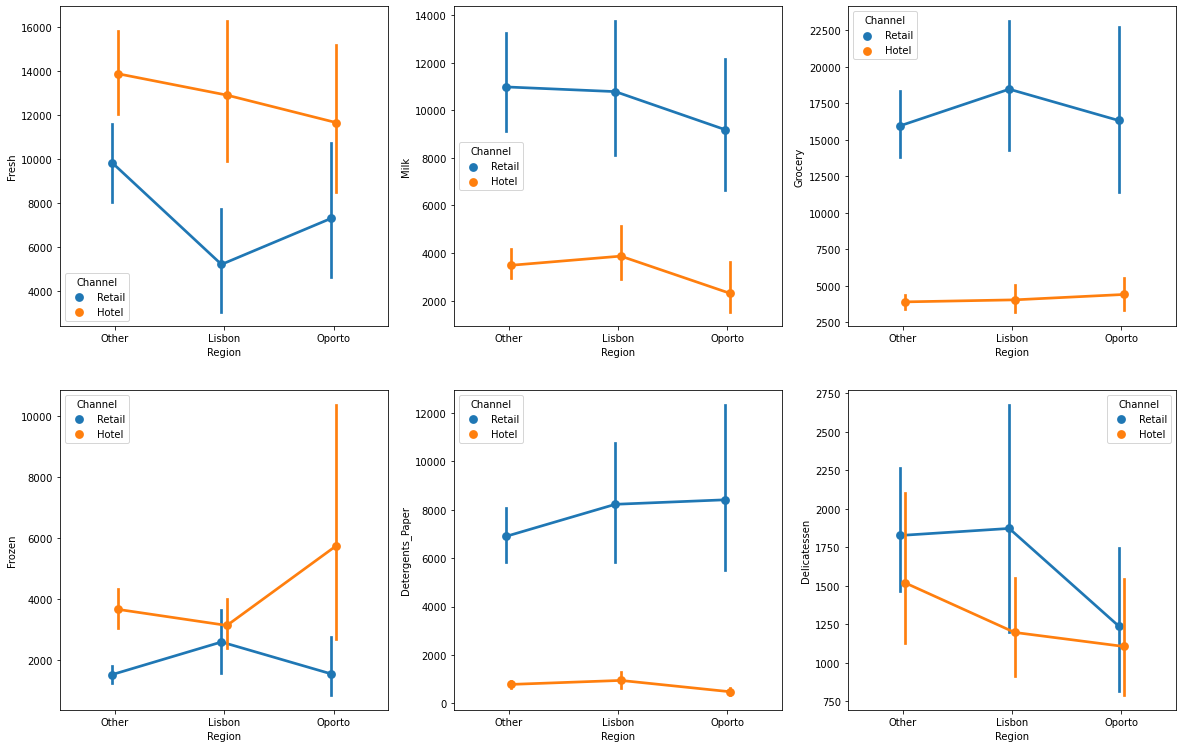

In [122]:
plt.figure(figsize= (20,20));
plt.subplot(3,3,1);
sns.pointplot('Region','Fresh', hue= 'Channel', data = cus, dodge=True);

plt.subplot(3,3,2);
sns.pointplot('Region','Milk', hue= 'Channel', data = cus, dodge=True);

plt.subplot(3,3,3);
sns.pointplot('Region','Grocery', hue= 'Channel', data = cus, dodge=True);

plt.subplot(3,3,4);
sns.pointplot('Region','Frozen', hue= 'Channel', data = cus, dodge=True);

plt.subplot(3,3,5);
sns.pointplot('Region','Detergents_Paper', hue= 'Channel', data = cus, dodge=True);

plt.subplot(3,3,6);
sns.pointplot('Region','Delicatessen', hue= 'Channel', data = cus, dodge=True);

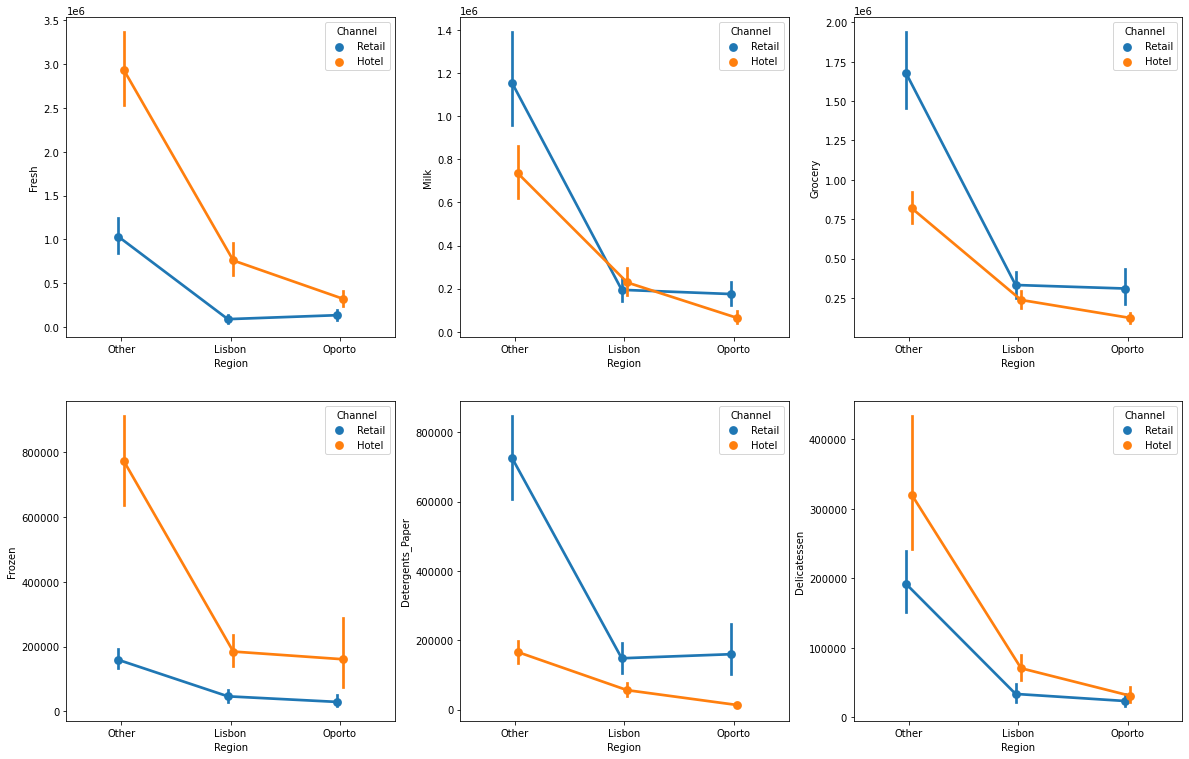

In [24]:
plt.figure(figsize= (20,20));
plt.subplot(3,3,1);
sns.pointplot('Region','Fresh', hue= 'Channel', data = cus, dodge=True, estimator = sum);

plt.subplot(3,3,2);
sns.pointplot('Region','Milk', hue= 'Channel', data = cus, dodge=True, estimator = sum);

plt.subplot(3,3,3);
sns.pointplot('Region','Grocery', hue= 'Channel', data = cus, dodge=True, estimator = sum);

plt.subplot(3,3,4);
sns.pointplot('Region','Frozen', hue= 'Channel', data = cus, dodge=True, estimator = sum);

plt.subplot(3,3,5);
sns.pointplot('Region','Detergents_Paper', hue= 'Channel', data = cus, dodge=True, estimator = sum);

plt.subplot(3,3,6);
sns.pointplot('Region','Delicatessen', hue= 'Channel', data = cus, dodge=True, estimator = sum);

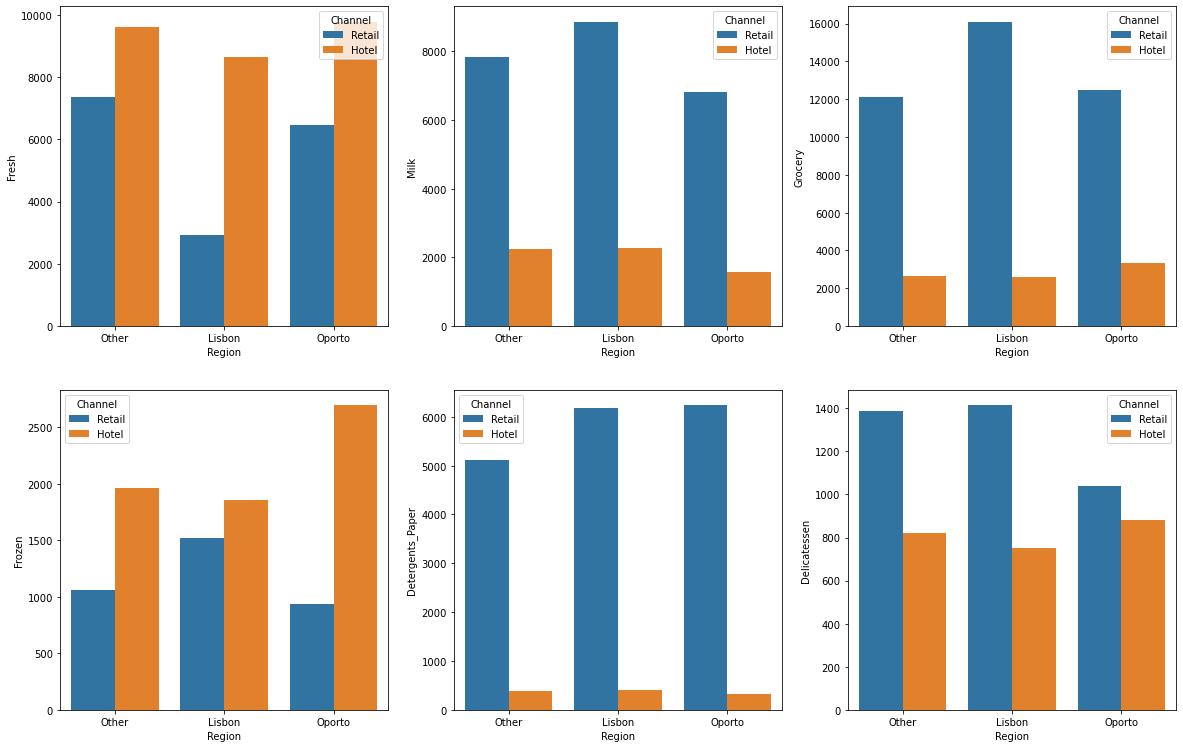

In [25]:
plt.figure(figsize= (20,20));
plt.subplot(3,3,1);
sns.barplot(x = 'Region', y= 'Fresh',hue ='Channel', data = cus, estimator = median, ci = None);

plt.subplot(3,3,2);
sns.barplot(x = 'Region', y= 'Milk',hue ='Channel', data = cus, estimator = median, ci = None);

plt.subplot(3,3,3);
sns.barplot(x = 'Region', y= 'Grocery',hue ='Channel', data = cus, estimator = median, ci = None);

plt.subplot(3,3,4);
sns.barplot(x = 'Region', y= 'Frozen',hue ='Channel', data = cus, estimator = median, ci = None);

plt.subplot(3,3,5);
sns.barplot(x = 'Region', y= 'Detergents_Paper',hue ='Channel', data = cus, estimator = median, ci = None);

plt.subplot(3,3,6);
sns.barplot(x = 'Region', y= 'Delicatessen',hue ='Channel', data = cus, estimator = median, ci = None);

In [26]:
# 1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?
# Which items shows the least inconsistent behaviour?
df = cus[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].describe().transpose() 
df
df.sort_values(by = 'mean',ascending = False)

count          mean           std   min      25%     50%  \
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicatessen      440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                       75%       max  
Fresh             16933.75  112151.0  
Grocery           10655.75   92780.0  
Milk               7190.25   73498.0  
Frozen             3554.25   60869.0  
Detergents_Paper   3922.00   40827.0  
Delicatessen       1820.25   47943.0

In [27]:
df['cov'] = df['std']/df['mean']
df['IQR'] = df['75%'] - df['25%']
df['Range'] = df['max'] - df['min']
df
df.sort_values(by = 'cov', ascending = True)

count          mean           std   min      25%     50%  \
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicatessen      440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                       75%       max       cov       IQR     Range  
Fresh             16933.75  112151.0  1.053918  13806.00  112148.0  
Grocery           10655.75   92780.0  1.195174   8502.75   92777.0  
Milk               7190.25   73498.0  1.273299   5657.25   73443.0  
Frozen             3554.25   60869.0  1.580332   2812.00   60844.0  
Detergents_Paper   3922.00   40827.0  1.654647   3665.25   40824.0  
Delicatessen       1820.25   47943.0  1.849407   1412.00   47940.0

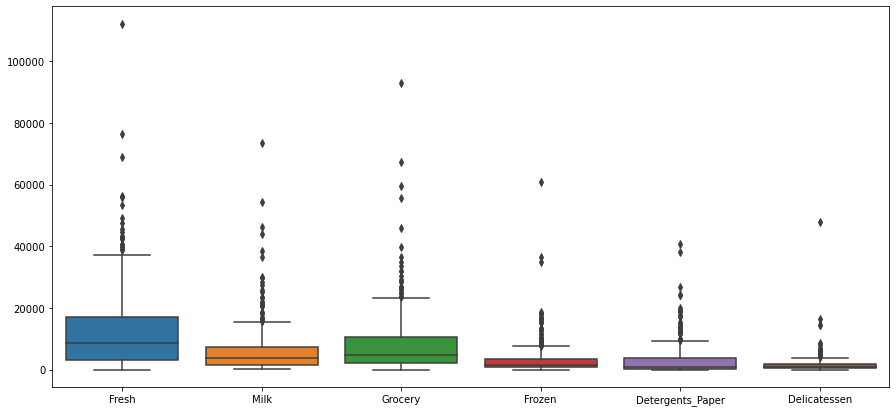

In [30]:
# 1.4. Are there any outliers in the data?
# Back up your answer with a suitable plot/technique and detailed comments.
# For the answer, we make a boxplot.
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(data = cus[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']], ax=ax);

In [31]:
# 1.5. On the basis of this report, what are the recommendations for the business? How will the analysis solve its problem?

In [32]:
"Problem set 2"

'Problem set 2'

In [33]:
sur = pd.read_csv('Survey-1.csv')

In [34]:
sur.shape

(62, 14)

In [35]:
sur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [36]:
sur.head()

ID  Gender  Age   Class       Major Grad Intention  GPA  Employment  \
0   1  Female   20  Junior       Other            Yes  2.9   Full-Time   
1   2    Male   23  Senior  Management            Yes  3.6   Part-Time   
2   3    Male   21  Junior       Other            Yes  2.5   Part-Time   
3   4    Male   21  Junior         CIS            Yes  2.5   Full-Time   
4   5    Male   23  Senior       Other      Undecided  2.8  Unemployed   

   Salary  Social Networking  Satisfaction  Spending Computer  Text Messages  
0    50.0                  1             3       350   Laptop            200  
1    25.0                  1             4       360   Laptop             50  
2    45.0                  2             4       600   Laptop            200  
3    40.0                  4             6       600   Laptop            250  
4    40.0                  2             4       500   Laptop            100

In [37]:
sur.isnull().values.any()

False

In [39]:
# This code generates a report using pandas-profiling. A section of its output will be go into the final business report.
# The pandas-profiling report is good for exploratory data analysis or EDA.
profile = ProfileReport(sur)
profile.to_file(output_file="output3.html")
#displaying the report, just one way of doing it.
profile.to_notebook_iframe()

In [40]:
# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)
# 2.1.1. Gender and Major
table1 = pd.crosstab(sur.Gender, sur.Major, margins = True) 
table1

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   
All              7    4                 11                       6   

Major   Management  Other  Retailing/Marketing  Undecided  All  
Gender                                                          
Female           4      3                    9          0   33  
Male             6      4                    5          3   29  
All             10      7                   14          3   62

In [41]:
# 2.1.2. Gender and Grad Intention
table2 = pd.crosstab(sur.Gender, sur['Grad Intention'], margins = True) 
table2

Grad Intention  No  Undecided  Yes  All
Gender                                 
Female           9         13   11   33
Male             3          9   17   29
All             12         22   28   62

In [42]:
# 2.1.3. Gender and Employment
table3 = pd.crosstab(sur.Gender, sur['Employment'], margins = True) 
table3

Employment  Full-Time  Part-Time  Unemployed  All
Gender                                           
Female              3         24           6   33
Male                7         19           3   29
All                10         43           9   62

In [43]:
# 2.1.4. Gender and Computer
table4 = pd.crosstab(sur.Gender, sur['Computer'], margins = True) 
table4

Computer  Desktop  Laptop  Tablet  All
Gender                                
Female          2      29       2   33
Male            3      26       0   29
All             5      55       2   62

In [44]:
# 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

# 2.2.1. What is the probability that a randomly selected CMSU student will be male?
# 2.2.2. What is the probability that a randomly selected CMSU student will be female?

Total = 62
Total_Female = 33
Total_Male = 29
Prob_female = Total_Female/Total
print('Probability that the student picked randomly is female : ', (Prob_female*100), '%')
Prob_male = Total_Male/Total
print('Probability that the student picked randomly is male: ', (Prob_male*100), '%')
#sur['Gender'].value_counts()

Probability that the student picked randomly is female :  53.2258064516129 %
Probability that the student picked randomly is male:  46.774193548387096 %


In [45]:
sur.describe().transpose()

count        mean         std    min     25%     50%  \
ID                  62.0   31.500000   18.041619    1.0   16.25   31.50   
Age                 62.0   21.129032    1.431311   18.0   20.00   21.00   
GPA                 62.0    3.129032    0.377388    2.3    2.90    3.15   
Salary              62.0   48.548387   12.080912   25.0   40.00   50.00   
Social Networking   62.0    1.516129    0.844305    0.0    1.00    1.00   
Satisfaction        62.0    3.741935    1.213793    1.0    3.00    4.00   
Spending            62.0  482.016129  221.953805  100.0  312.50  500.00   
Text Messages       62.0  246.209677  214.465950    0.0  100.00  200.00   

                      75%     max  
ID                  46.75    62.0  
Age                 22.00    26.0  
GPA                  3.40     3.9  
Salary              55.00    80.0  
Social Networking    2.00     4.0  
Satisfaction         4.00     6.0  
Spending           600.00  1400.0  
Text Messages      300.00   900.0

In [46]:
# 2.3.1. Find the conditional probability of different majors among the male students in CMSU.
table1

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   
All              7    4                 11                       6   

Major   Management  Other  Retailing/Marketing  Undecided  All  
Gender                                                          
Female           4      3                    9          0   33  
Male             6      4                    5          3   29  
All             10      7                   14          3   62

In [47]:
# Probability of having accounting as major given the student is male = P(Accounting/Male) = P(Accounting and Male)/P(Male)
# From the above contingency table
P_Accounting_and_male = 4/62
P_male = 29/62
P_Accounting_given_male = P_Accounting_and_male / P_male
# Likewise for other major subjects
P_CIS_and_male = 1/62
P_Economics_Finance_and_male = 4/62
P_InternationalBusiness_and_male = 2/62
P_Management_and_male = 6/62
P_Other_and_male = 4/62
P_Retailing_Marketing_and_male = 5/62
P_Undecided_and_male = 3/62
print('Probability of Accounting as major given the student is male: %1.4f' %(P_Accounting_and_male / P_male))
print('Probability of CIS as major given the student is male: %1.4f' %(P_CIS_and_male / P_male))
print('Probability of Economics/Finance as major given the student is male: %1.4f' %(P_Economics_Finance_and_male / P_male))
print('Probability of International Business as major given the student is male: %1.4f' %(P_InternationalBusiness_and_male / P_male))
print('Probability of Management as major given the student is male: %1.4f' %(P_Management_and_male / P_male))
print('Probability of Other as major given the student is male: %1.4f' %(P_Other_and_male / P_male))
print('Probability of Retailing/Marketing as major given the student is male: %1.4f' %(P_Retailing_Marketing_and_male / P_male))
print('Probability of Undecided about major given the student is male: %1.4f' %(P_Undecided_and_male / P_male))

Probability of Accounting as major given the student is male: 0.1379
Probability of CIS as major given the student is male: 0.0345
Probability of Economics/Finance as major given the student is male: 0.1379
Probability of International Business as major given the student is male: 0.0690
Probability of Management as major given the student is male: 0.2069
Probability of Other as major given the student is male: 0.1379
Probability of Retailing/Marketing as major given the student is male: 0.1724
Probability of Undecided about major given the student is male: 0.1034


In [48]:
x = sur.groupby("Gender").size().div(len(sur))
x

Gender
Female    0.532258
Male      0.467742
dtype: float64

In [49]:
y = sur.groupby(["Gender", 'Major']).size().div(len(sur)).div(x)
y

Gender  Major                 
Female  Accounting                0.090909
        CIS                       0.090909
        Economics/Finance         0.212121
        International Business    0.121212
        Management                0.121212
        Other                     0.090909
        Retailing/Marketing       0.272727
Male    Accounting                0.137931
        CIS                       0.034483
        Economics/Finance         0.137931
        International Business    0.068966
        Management                0.206897
        Other                     0.137931
        Retailing/Marketing       0.172414
        Undecided                 0.103448
dtype: float64

In [50]:
# 2.3.2. Find the conditional probability of different majors among the female students of CMSU.

# Probability of having accounting as major given the student is female = P(Accounting/Female) = P(Accounting and Female)/P(Female)
#from the above contingency table
P_Accounting_and_female = 3/62
P_female = 33/62
P_Accounting_given_female = P_Accounting_and_female / P_female
# Likewwise for other major subjects
P_CIS_and_female = 3/62
P_Economics_Finance_and_female = 7/62
P_InternationalBusiness_and_female = 4/62
P_Management_and_female = 4/62
P_Other_and_female = 3/62
P_Retailing_Marketing_and_female = 9/62
P_Undecided_and_female = 0/62
print('Probability of Accounting as major given the student is female: %1.4f' %(P_Accounting_and_female / P_female))
print('Probability of CIS as major given the student is female: %1.4f' %(P_CIS_and_female / P_female))
print('Probability of Economics/Finance as major given the student is female: %1.4f' %(P_Economics_Finance_and_female / P_female))
print('Probability of International Business as major given the student is female: %1.4f' %(P_InternationalBusiness_and_female / P_female))
print('Probability of Management as major given the student is female: %1.4f' %(P_Management_and_female / P_female))
print('Probability of Other as major given the student is female: %1.4f' %(P_Other_and_female / P_female))
print('Probability of Retailing/Marketing as major given the student is female: %1.4f' %(P_Retailing_Marketing_and_female / P_female))
print('Probability of Undecided about major given the student is female: %1.4f' %(P_Undecided_and_female / P_female))

Probability of Accounting as major given the student is female: 0.0909
Probability of CIS as major given the student is female: 0.0909
Probability of Economics/Finance as major given the student is female: 0.2121
Probability of International Business as major given the student is female: 0.1212
Probability of Management as major given the student is female: 0.1212
Probability of Other as major given the student is female: 0.0909
Probability of Retailing/Marketing as major given the student is female: 0.2727
Probability of Undecided about major given the student is female: 0.0000


In [51]:
# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
# 2.4.1. Find the probability that a randomly chosen student is a male and intends to graduate..
table2

Grad Intention  No  Undecided  Yes  All
Gender                                 
Female           9         13   11   33
Male             3          9   17   29
All             12         22   28   62

In [52]:
#Probability of intent for males
P_male = 29/62
P_Yes_and_male = 17/62
print('Probability of having intent as Yes given the student is male: %1.4f' %(P_Yes_and_male / P_male))

Probability of having intent as Yes given the student is male: 0.5862


In [53]:
# 2.4.2. Find the probability that a randomly selected student is a female and does NOT have a laptop.
print (table4)

P_female = 33/62
P_No_Laptop_and_female = 4/62
# 4 is the complement of 29 (females with laptop) out of a sample space of 33
print('Probability of finding a female student without a laptop: %1.4f' %(P_No_Laptop_and_female))
P_No_Laptop_given_female = P_No_Laptop_and_female / P_female
print('Probability of finding a student without a laptop, given that she is a female: %1.4f' %(P_No_Laptop_and_female / P_female))

Computer  Desktop  Laptop  Tablet  All
Gender                                
Female          2      29       2   33
Male            3      26       0   29
All             5      55       2   62
Probability of finding a female student without a laptop: 0.0645
Probability of finding a student without a laptop, given that she is a female: 0.1212


In [54]:
# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
# 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?
# Find the conditional probability of employment status for the male students as well as for the female students.
table3

Employment  Full-Time  Part-Time  Unemployed  All
Gender                                           
Female              3         24           6   33
Male                7         19           3   29
All                10         43           9   62

In [55]:
#Probability of having employment status as Full-Time or a student as male = P(Male) union P(Full-time),
# which is P(Male)+P(Full-time), since the condition here is 'or'
P_FullTime = 10/62
P_male = 29/62
print ('Probability of having employment status as Full-Time or a student as male: %1.4f' %(P_FullTime+P_male))

Probability of having employment status as Full-Time or a student as male: 0.6290


In [56]:
# 2.5.2. Find the conditional probability that given a female student is randomly chosen,
# she is majoring in international business or management.
print('For International Business:')
print('P(InternationalBusiness/female) : P(InternationalBusiness) = %1.4f' %(P_InternationalBusiness_and_female / P_female), ': %1.4f' %(6/62))
print('For Management:')
print('P(Management/female) : P(Management) = %1.4f' %(P_Management_and_female / P_female), ': %1.4f' %(10/62))
P_InternationalBusiness_and_female = 6/62
P_Management_and_female = 10/62
print('Probability of having international business or management as major given that the student is female: %1.4f' %(P_InternationalBusiness_and_female + P_Management_and_female / P_female))

For International Business:
P(InternationalBusiness/female) : P(InternationalBusiness) = 0.1212 : 0.0968
For Management:
P(Management/female) : P(Management) = 0.1212 : 0.1613
Probability of having international business or management as major given that the student is female: 0.3998


In [67]:
# 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No).
# The Undecided students are not considered now and the table is a 2x2 table.
# Do you think the graduate intention and being female are independent events?
table2 = pd.crosstab(sur.Gender, sur['Grad Intention'], margins = True) 
print(table2)
print('')
P_No_and_male = 3/62
P_male = 29/62
P_No_given_male = P_No_and_male / P_male
#similarly doing for other intents
P_Undecided_and_male = 9/62
P_Yes_and_male = 17/62
P_No_and_female = 9/62
P_female = 33/62
P_No_given_female = P_No_and_female / P_female
#similarly doing for other intents
P_Undecided_and_female = 13/62
P_Yes_and_female = 11/62
print('For No')
print('P(No/male) : P(No/female) : P(No) = %1.4f' %(P_No_and_male / P_male), ': %1.4f' %(P_No_and_female / P_female), ': %1.4f' %(12/62))
print('')
print('For Yes')
print('P(Yes/male) : P(Yes/female) : P(Yes) = %1.4f' %(P_Yes_and_male / P_male), ': %1.4f' %(P_Yes_and_female / P_female), ': %1.4f' %(28/62))

Grad Intention  No  Undecided  Yes  All
Gender                                 
Female           9         13   11   33
Male             3          9   17   29
All             12         22   28   62

For No
P(No/male) : P(No/female) : P(No) = 0.1034 : 0.2727 : 0.1935

For Yes
P(Yes/male) : P(Yes/female) : P(Yes) = 0.5862 : 0.3333 : 0.4516


In [84]:
# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.
# Answer the following questions based on the data
# 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

table5=pd.crosstab(sur['Gender'],(sur['GPA']<3),margins=True,margins_name='Total')
print(table5)
print('')

print('The probability that that a random student has GPA less than 3 is', 17/62)
print('')

# 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more.
table6 = pd.crosstab(sur['Gender'],(sur['Salary']>=50),margins=True,margins_name='Total')
print(table6)
print('')
print('The probability that that a randomly selected male earns 50 or more is', 14/29)

# Find the conditional probability that a randomly selected female earns 50 or more.
print('The probability that that a randomly selected female earns 50 or more is', 18/33)

GPA     False  True  Total
Gender                    
Female     25     8     33
Male       20     9     29
Total      45    17     62

The probability that that a random student has GPA less than 3 is 0.27419354838709675

Salary  False  True  Total
Gender                    
Female     15    18     33
Male       15    14     29
Total      30    32     62

The probability that that a randomly selected male earns 50 or more is 0.4827586206896552
The probability that that a randomly selected female earns 50 or more is 0.5454545454545454


In [118]:
# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.
# For each of them comment whether they follow a normal distribution.
# Write a note summarizing your conclusions for this whole Problem 2.

#Calculate percentage of data within 1 standard deviation away from mean
#Salary: We observe from below that Salary follows empirical rule,  so we assume that it follows normal distribution
no_of_obs_sal=62
sal_mean=sur['Salary'].mean()
sal_std=sur['Salary'].std()
one_time_std_right=sal_mean+sal_std
one_time_std_left=sal_mean-sal_std
count_1std= ((sur['Salary'] < one_time_std_right) & (sur['Salary'] > one_time_std_left)).sum()
Per_1std= (count_1std/no_of_obs_sal) * 100
Per_1std

79.03225806451613

In [119]:
#Spending:We observe from below that 80% of the data lies within 1 standard deviation, so we say it follows normal distribution
no_of_obs_sal=62
sal_mean=sur['Spending'].mean()
sal_std=sur['Spending'].std()
one_time_std_right=sal_mean+sal_std
one_time_std_left=sal_mean-sal_std
count_1std= ((sur['Spending'] < one_time_std_right) & (sur['Spending'] > one_time_std_left)).sum()
Per_1std= (count_1std/no_of_obs_sal) * 100
Per_1std

80.64516129032258

In [120]:
#Text Messages: We observe from below that 79% of data lies within 1 standard deviation following the empirical rule, 
# hence it follows normal distribution
no_of_obs_sal=62
sal_mean=sur['Text Messages'].mean()
sal_std=sur['Text Messages'].std()
one_time_std_right=sal_mean+sal_std
one_time_std_left=sal_mean-sal_std
count_1std= ((sur['Text Messages'] < one_time_std_right) & (sur['Text Messages'] > one_time_std_left)).sum()
Per_1std= (count_1std/no_of_obs_sal) * 100
Per_1std

79.03225806451613

In [ ]:
# if P(Male) = P(Something/male) then they are independent
# If these values are way different then they are not independent
# We often assume that events are independent and test that assumption on sample data. 
# If the probabilities are significantly different, then we conclude the events are not independent. 
# Two events, A and B, are independent if P(A/B) = P(A) and P(B/A) = P(B)
# Events A and B are independent if the equation P(A∩B) = P(A) · P(B)

In [ ]:
# Part II

# 2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
# Write a note summarizing your conclusions.
# [Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]

In [88]:
sur[['Salary','Spending','Text Messages']].describe().transpose()

count        mean         std    min    25%    50%    75%  \
Salary          62.0   48.548387   12.080912   25.0   40.0   50.0   55.0   
Spending        62.0  482.016129  221.953805  100.0  312.5  500.0  600.0   
Text Messages   62.0  246.209677  214.465950    0.0  100.0  200.0  300.0   

                  max  
Salary           80.0  
Spending       1400.0  
Text Messages   900.0

In [ ]:
#Performing the Shapiro-Wilk test for normality. consider alpha = 0.05
print('Salary',shapiro(sur['Salary']))
print('Spending',shapiro(sur['Spending']))
print('Text Messages',shapiro(sur['Text Messages']))

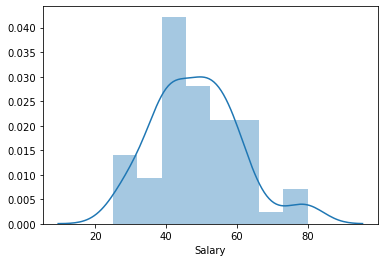

In [85]:
sns.distplot(sur['Salary'])

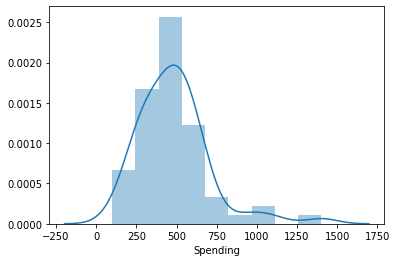

In [86]:
sns.distplot(sur['Spending'])

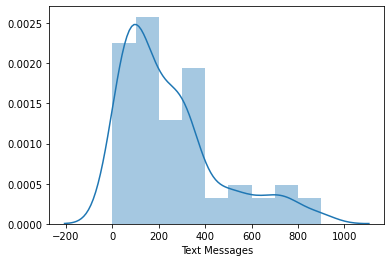

In [87]:
sns.distplot(sur['Text Messages'])

In [90]:
"Problem Set 3"

'Problem Set 3'

In [92]:
ab = pd.read_csv('A & B shingles-1.csv')

In [93]:
ab.head()

A     B
0  0.44  0.14
1  0.61  0.15
2  0.47  0.31
3  0.30  0.16
4  0.15  0.37

In [96]:
ab.describe()

A          B
count  36.000000  31.000000
mean    0.316667   0.273548
std     0.135731   0.137296
min     0.130000   0.100000
25%     0.207500   0.160000
50%     0.290000   0.230000
75%     0.392500   0.400000
max     0.720000   0.580000

In [97]:
# This code generates a report using pandas-profiling. A section of its output will be go into the final business report.
# The pandas-profiling report is good for exploratory data analysis or EDA.
profile = ProfileReport(ab)
profile.to_file(output_file="output4.html")
#displaying the report, just one way of doing it.
profile.to_notebook_iframe()

In [ ]:
#3.1.For the A shingles, form the null and alternative hypothesis
# to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.

#Define Null and alternate hypothesis for sample A
# step 1:
#Testing whether the moisture content is less the permissible limit
# The null hypothesis states that the moisture content of sample A is greater or than equal to the permissible limit, 𝜇 ≥ 0.35
# The alternative hypothesis states that the moisture content of sample A is less than permissible limit, 𝜇 < 0.35

#𝐻0 : 𝜇 ≥ 0.35

#𝐻𝐴 : 𝜇 < 0.35

#Step 2: Decide the significance level
#Here we select 𝛼 = 0.05 as given in the question.

#Step 3: Identify the test statistic¶
#We have two samples (A and B) and we do not know the population standard deviation. Sample sizes for both samples are not the same. The sample size is , n > 30. So we use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic for one sample test for A sample. One tail test for sample A

#Step 4: Calculate the p - value and test statistic

In [103]:
t_statistic, p_value = ttest_1samp(ab['A'],0.35, nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value/2)

tstat -1.4735046253382782
P Value 0.07477633144907513


In [ ]:
False
Step 5: Decide to reject or accept null hypothesis

In [104]:
print ("one-sample t-test p-value=", p_value/2)

alpha_level = 0.05

if (p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the moisture content is greater than permissible limit in sample A.')

one-sample t-test p-value= 0.07477633144907513
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the moisture content is greater than permissible limit in sample A.


In [ ]:
# For the B shingles, form the null and alternative hypothesis 
# to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.

# Define Null and alternate hypothesis for sample B
# step 1:
# Testing whether the moisture content is less the permissible limit

# The null hypothesis states that the moisture content of sample B is greater or than equal to the permissible limit, 𝜇 ≥ 0.35

# The alternative hypothesis states that the moisture content of sample B is less than permissible limit, 𝜇 < 0.35

# 𝐻0 : 𝜇 ≥ 0.35

# 𝐻𝐴 : 𝜇 < 0.35

# Step 2: Decide the significance level
# Here we select 𝛼 = 0.05 as given in the question.

# Step 3: Identify the test statistic¶
# We have two samples (A and B) and we do not know the population standard deviation. Sample sizes for both samples are not the same. The sample size is , n > 30. So we use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic for one sample test for B sample. one tail test for Sample B

# Step 4: Calculate the p - value and test statistic

In [105]:
t_statistic, p_value = ttest_1samp(ab['B'],0.35, nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value/2)

tstat -3.1003313069986995
P Value 0.0020904774003191826


In [ ]:
# Step 5: Decide to reject or accept null hypothesis

In [106]:
print ("one-sample t-test p-value=", p_value/2)

alpha_level = 0.05

if (p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the moisture content is less than permissible limit in sample B.')
    
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

one-sample t-test p-value= 0.0020904774003191826
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the moisture content is less than permissible limit in sample B.


In [ ]:
# 3.2. Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

# step 1:
# Define Null and alternate hypothesis
# In testing whether the mean for shingles A and Shingles B are the same, the null hypothesis states that the mean of shingle A to mean of shingle B are the same, $\mu{A}$ equals $\mu{B}$. The alternative hypothesis states that the mean are different, $\mu{A}$ is not equal to $\mu{B}$

# $H_0$: $\mu{A}$ - $\mu{B}$ $\neq$ 0 i.e $\mu{A}$ $\neq$ $\mu{B}$
# $H_A$: $\mu{A}$ - $\mu{B}$ = 0 i.e $\mu{A}$ = $\mu{B}$
# Step 2: Decide the significance level
# Here we select $\alpha$ = 0.05 and the population standard deviation is not known.

# Step 3: Identify the test statistic
# We have two samples and we do not know the population standard deviation. Sample sizes for both samples are not the same. The sample size is , n > 30. So we use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic for two sample test.

# Step 4: Calculate the p - value and test statistic

In [109]:
t_statistic, p_value  = ttest_ind(ab['A'],ab['B'],nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value)

tstat 1.2896282719661123
P Value 0.2017496571835306


In [ ]:
# Step 5: Decide to reject or accept null hypothesis

In [110]:
print ("two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
     print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that mean for shingles A and singles B are not the same')

two-sample t-test p-value= 0.2017496571835306
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that mean for shingles A and singles B are not the same


In [ ]:
# What assumption do you need to check before the test for equality of means is performed?
The assumptions
# 1. The data must be sampled randomly from the population of interest.
# 2. The data variables follow a normal distribution.
# 3. The data size is at least 30.